In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

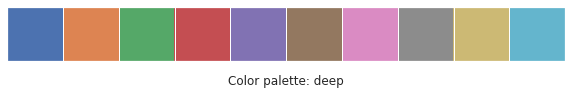

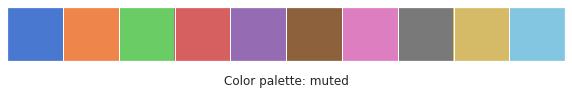

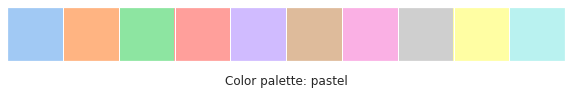

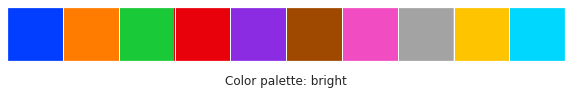

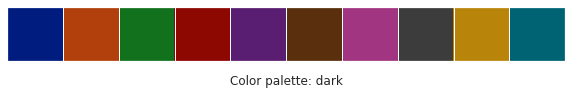

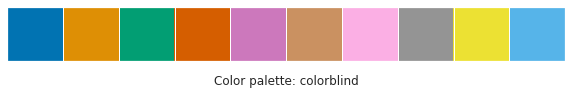

In [2]:
# Plot color palette
def plot_color_palette(palette: str):
    figure = sns.palplot(sns.color_palette())
    plt.xlabel("Color palette: " + palette)
    plt.show(figure)

palettes = ["deep", "muted", "pastel", "bright", "dark", "colorblind"]
for palette in palettes:
    sns.set(palette=palette)
    plot_color_palette(palette)

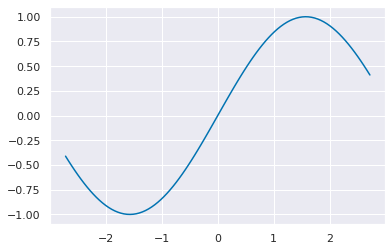

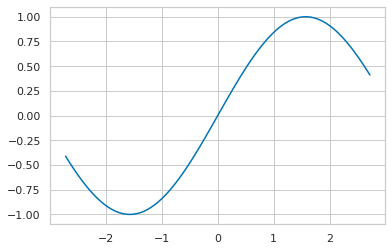

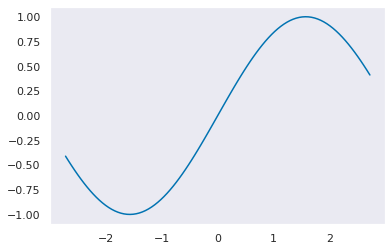

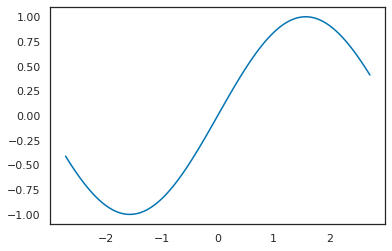

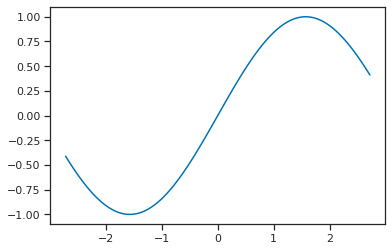

In [3]:
# Plot style
styles = ["darkgrid", "whitegrid", "dark", "white","ticks"]
for style in styles:
    sns.set_style(style)
    x = np.linspace(-np.e, np.e, 100) 
    y = np.sin(x)
    plt.plot(x,y)
    plt.show()

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab csv files/Pokemon.csv', encoding='mac_roman', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
sns.set()
sns.set(rc={'figure.figsize':(10,10)})

In [6]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']))

In [7]:
# sns.load_dataset('tips')['size'].describe()
# https://honingds.com/blog/seaborn-scatterplot/

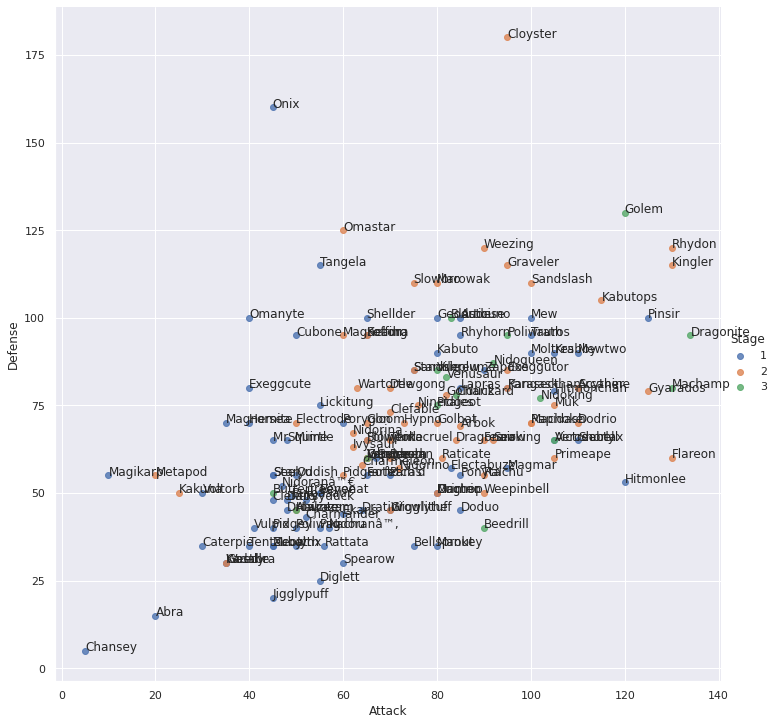

In [8]:
sns.lmplot(x='Attack', y='Defense', hue='Stage', fit_reg=False, height=10, data=df)
label_point(df['Attack'], df['Defense'], df['Name'], plt.gca())  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Attack by Type')

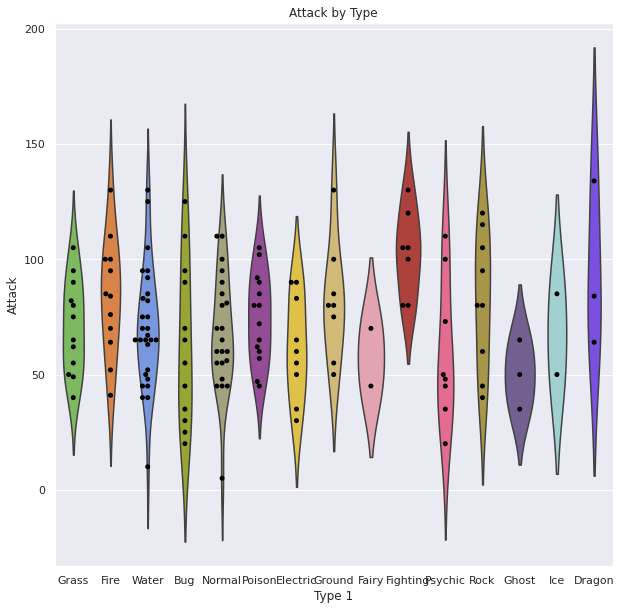

In [9]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Violin plot
sns.violinplot(x='Type 1',
              y='Attack',
              data=df,
              palette=pkmn_type_colors,
              inner=None)
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              split=True,
              color='black') # Make points black
plt.title('Attack by Type')

In [10]:
melted_df = pd.melt(df.drop(['Total','Stage','Legendary'],axis=1), 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; y

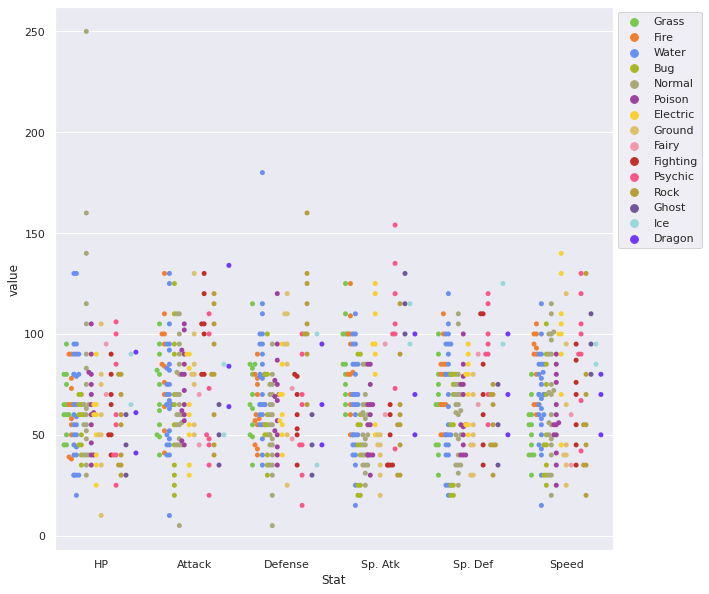

In [11]:
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1',
              dodge=True,
              palette=pkmn_type_colors)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:>

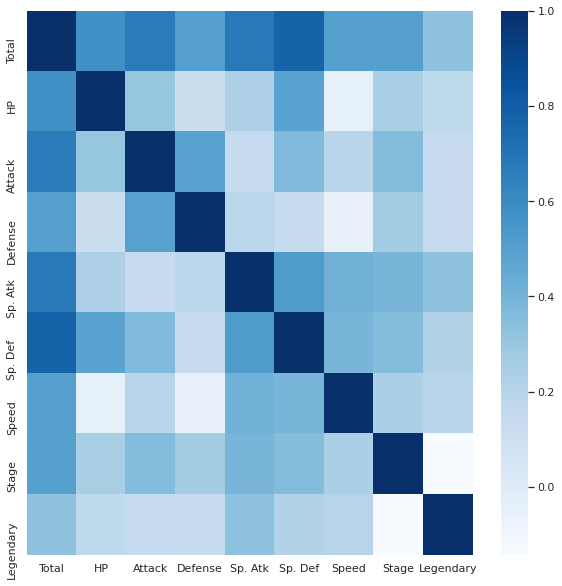

In [12]:
sns.heatmap(df.corr(),cmap='Blues')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

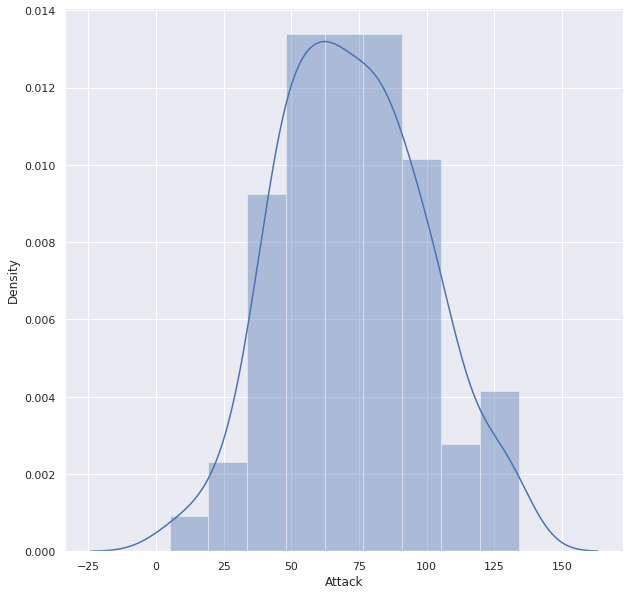

In [13]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

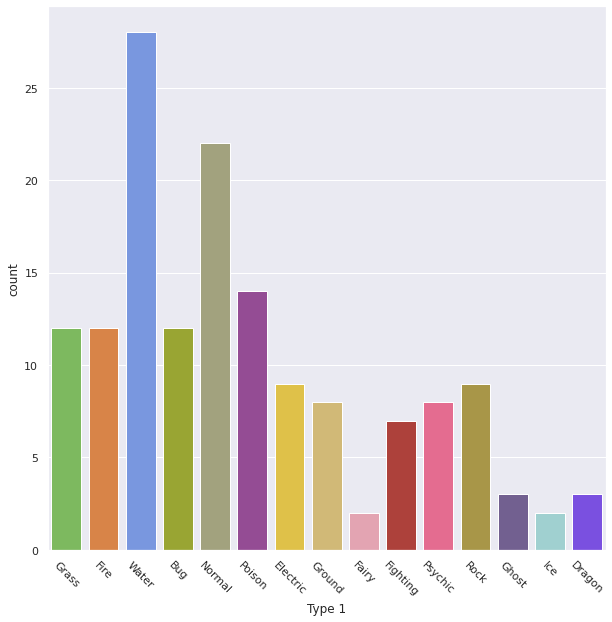

In [14]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

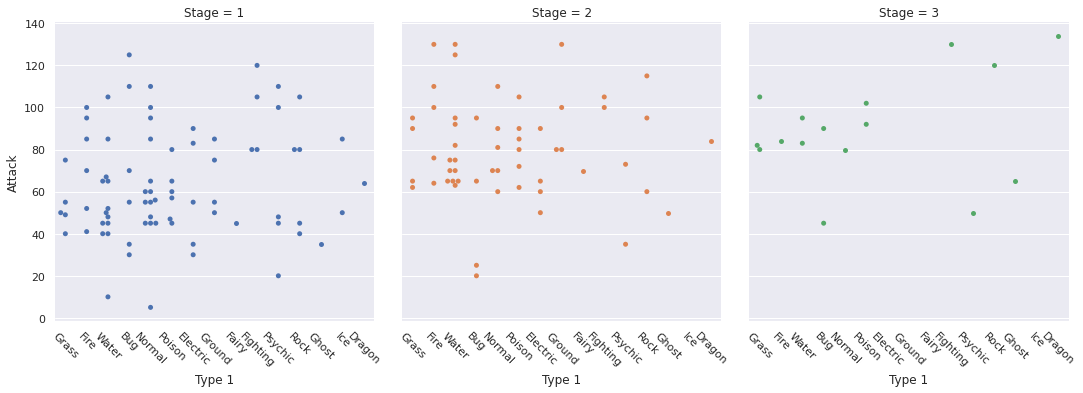

In [15]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
  
g.set_xticklabels(rotation=-45).despine(left=True)
# Doesn't work because only rotates last plot
#plt.xticks(rotation=-45)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

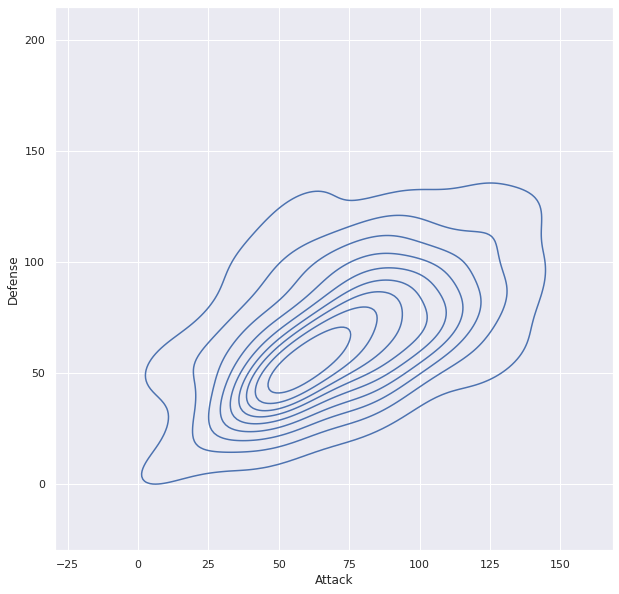

In [16]:
sns.kdeplot(df.Attack, df.Defense)
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

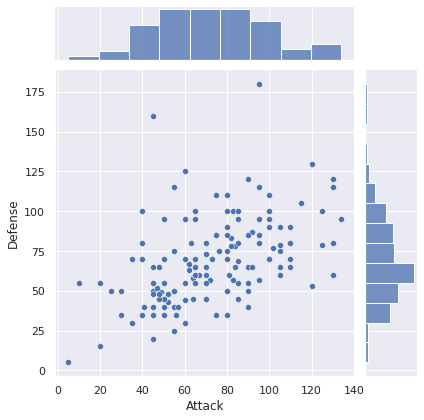

In [17]:
#Joint distribution plots combine information from scatter plots and histograms 
# to give you detailed information for bi-variate distributions.
sns.jointplot(x='Attack', y='Defense', data=df)